### Importing main dependecies

In [1]:
import numpy as np
from scipy.optimize import minimize

### Data

In [2]:
data_outputs =  np.array([[262521.02907266,346760.656260418,461290.60448595,344188.863677228,294231.297066693,345783.525320436,670122.214940625,786296.233232622,727266.439858377,687145.593548194,613688.786934742,177792.367994311,411511.034331357,475665.819349655,2102727.8261244,337951.80373594,249122.662771625,985591.107898336,462249.512119451,1162960.84406201,219543.804449336,269794.86660802,655462.207361263,397384.070821253,106815.706326885,1092761.76551572,95351.9114732475,401326.485602659,244175.697125257,340890.953115421,162342.780828482,757537.710512358,273569.38914776]])/10000
data_outputs = np.transpose(data_outputs)
data_inputs =np.array([[66340.66664431],[43983.62],[55783.9667751247],[27521.3753251431],[41283],[19147.96],[55620.26491],[151465.12],[215567.507554621],[116756.978720517],[132607.15],[83766.1023802807],[125549.065648061],[166179.32],[503695.91],[86860.16263],[53314.9],[262555.258252406],[137649.034],[235881.91],[51067],[23269.3],[123209.322],[110915.32575],[18410],[47335.086682134],[27061.378],[87213.8],[69882.77],[60840.5736579949],[27137.42],[72536.3],[82441.55]])/100000

print('Inputs: ',data_inputs.shape)
print('Outputs: ',data_outputs.shape)
inputs = np.copy(data_inputs)
outputs = np.copy(data_outputs)

#flatting data
inputs = inputs.flatten('F')
outputs = outputs.flatten()

#horizontal stacking
data = np.around(np.hstack((outputs,inputs)),decimals=3)
print('data shape:',data.shape)

Inputs:  (33, 1)
Outputs:  (33, 1)
data shape: (66,)


### Vector with Alphas an Betas to Initialize

In [3]:
alpha = np.random.normal(1,0.1,(outputs.shape))
#alpha = np.array([[2.625,0.229,0.229,0.229]])
beta = np.random.normal(1,0.1,(inputs.shape))
#beta = np.array([[0],[3.611],[3.611],[3.611]])
#flatting data
alpha = alpha.flatten()
beta = beta.flatten()

#horizontal stacking
parameters = np.around(np.hstack((alpha,beta)),decimals=3)
print('parameters shape:',parameters.shape)

parameters shape: (66,)


### Function to Minimize

In [4]:
def function_to_minimize(p):
    function = 0.0
    h = outputs.shape[0]
    i = 0
    while i < outputs.shape[0]:
        function += (p[i] - data[i] + data[i + h]*p[i + h])**2
        i += 1
    return function
#print(function_to_minimize(parameters))

### Constraints

In [5]:
cons='('
i = 0 
c = outputs.shape[0]
while i < c:
    j = 0
    while j < c:
        if i != j:
            str1='{\'type\': \'ineq\', \'fun\': lambda p: -(p['+str(i)+    '] + p['+str(i+c)+']*data['+str(c+i)+'])' 
            str2=                                     '+( p['+str(j)+'] + p['+str(j+c)+']*data['+str(c+i)+'])}'
            cons =cons+str1+str2+',\n'
            j +=1
        else:
            if i == outputs.shape[0]-1:
                cons = cons + ')'
            j+=1
    i += 1
cons = eval(cons)
#print(cons)

### Bounds

In [6]:
bounds = '('
for i in range(outputs.shape[0]):
    bounds += '(None,None),'
bounds+='\n'
for i in range(inputs.shape[0]):
    bounds += '(0,None),'
bounds += ')'

bounds = eval(bounds)

### Optimizing

In [7]:
evaluation = minimize(function_to_minimize,parameters,method='SLSQP',bounds=bounds,constraints =cons)
print(evaluation['message'])
print('iterations:',evaluation['nit'])

vetor = evaluation['x']

Optimization terminated successfully.
iterations: 27


In [8]:
parameters = vetor
evaluation = minimize(function_to_minimize,parameters,method='SLSQP',bounds=bounds,constraints =cons)
print(evaluation['message'])
print('iterations:',evaluation['nit'])

vetor = evaluation['x']
print(vetor)

Optimization terminated successfully.
iterations: 5
[   15.79473323    15.79473322    15.79473323    15.79473322    15.79473322
   -30.66811942    15.79473323    15.79473329    15.79473329    15.79473328
    15.79473329    15.79473326    15.79473328    15.79473329    36.01607462
    15.79473327    15.79473323    15.79473329    15.79473329    15.79473329
    15.79473323    15.79473322    15.79473328    15.79473327  -299.24316956
    15.79473323    15.79473322    15.79473327    15.79473323    15.79473323
    15.79473322    15.79473323    15.79473323    34.9562511     34.95625112
    34.95625111    34.95625113    34.95625112   278.2172597     34.95625111
    34.95625104    34.95625104    34.95625105    34.95625105    34.95625107
    34.95625105    34.95625104    30.94169052    34.95625106    34.95625111
    34.95625104    34.95625104    34.95625104    34.95625111    34.95625113
    34.95625105    34.95625105  1684.37323008    34.95625111    34.95625113
    34.95625105    34.9562511     34

### Parameters Alphas and Betas

In [9]:
alphas,betas = np.around(np.split(vetor,2),decimals=4)
#alphas = np.expand_dims(alphas,axis=0)
#betas = np.expand_dims(betas,axis=0)
print(alphas)

matrixAB = np.vstack((alphas,betas))
matrixAB = matrixAB.T
main_hyperplanes = np.unique(matrixAB,axis=0)
print(main_hyperplanes)

[  15.7947   15.7947   15.7947   15.7947   15.7947  -30.6681   15.7947
   15.7947   15.7947   15.7947   15.7947   15.7947   15.7947   15.7947
   36.0161   15.7947   15.7947   15.7947   15.7947   15.7947   15.7947
   15.7947   15.7947   15.7947 -299.2432   15.7947   15.7947   15.7947
   15.7947   15.7947   15.7947   15.7947   15.7947]
[[ -299.2432  1684.3732]
 [  -30.6681   278.2173]
 [   15.7947    34.9563]
 [   36.0161    30.9417]]


### Looking for the Highest error to fit the envelopment

In [10]:
def highest_error(p):
    array = np.array([0])
    function = 0.0
    h = outputs.shape[0]
    i = 0
    while i < outputs.shape[0]:
        function = -p[i] + data[i] - data[i + h]*p[i + h]
        array = np.append(array,[function])
        i += 1
    return array

correct = np.amax(highest_error(vetor))

### Adjusting the Alpha values for envelopment

In [11]:
for i in range(0,main_hyperplanes.shape[0]):
    main_hyperplanes[i][0] += correct
print(main_hyperplanes)


[[ -222.29624  1684.3732 ]
 [   46.27886   278.2173 ]
 [   92.74166    34.9563 ]
 [  112.96306    30.9417 ]]


### Ploting Results

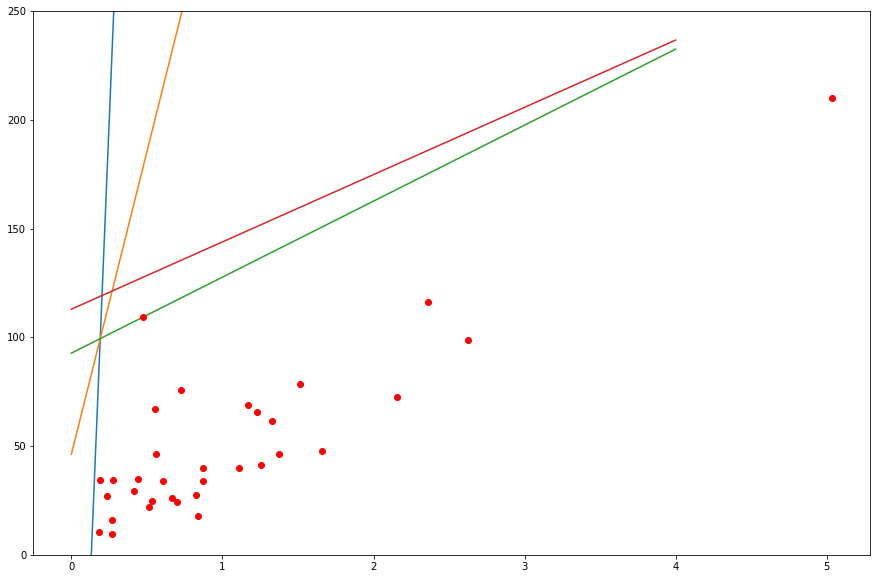

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for j in range(0,main_hyperplanes.shape[0]):
    x = [i for i in range(0,5)]
    y = [main_hyperplanes[j][0]+ main_hyperplanes[j][1]*i for i in x]
    plt.plot(x,y)

plt.plot(inputs,outputs,'ro')
plt.ylim(0,250)

plt.show()